In [42]:
import scipy.io.wavfile as wavfile
import scipy.fftpack as fftpack
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

In [43]:
ChoixMusique = "1"

In [44]:
sound = AudioSegment.from_wav("./music/music"+str(ChoixMusique)+".wav")
sound = sound.set_channels(1)
sound.export("./music/music"+str(ChoixMusique)+"mono.wav", format="wav")

<_io.BufferedRandom name='./music/music1mono.wav'>

In [45]:
s_rate, signal = wavfile.read("./music/music"+str(ChoixMusique)+"mono.wav")

In [46]:
FFT = abs(fftpack.fft(signal))
freq = fftpack.fftfreq(len(FFT), 1/s_rate)

Text(0, 0.5, 'Amplitude')

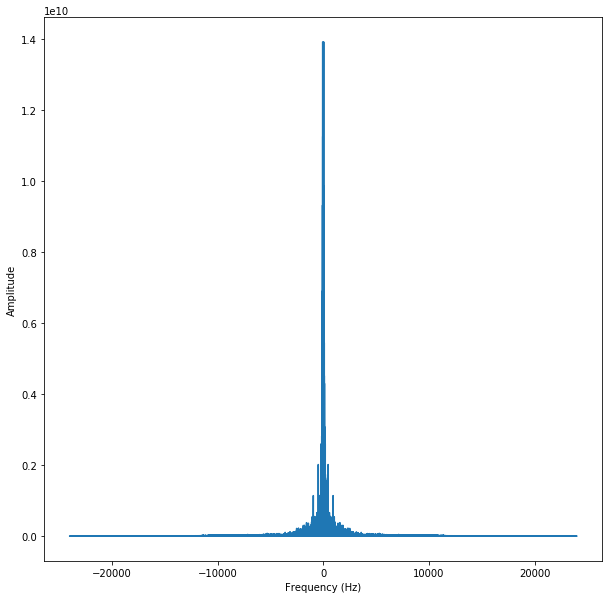

In [47]:
plt.figure(figsize=(10,10))
plt.plot(freq, FFT)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

In [48]:
print(len(FFT))

10581612
